In [ ]:
##example notebook of pedigree generating functions + msprime ancestry simulation on pedigrees

In [1]:
from project_lib.genotype_simulation import *
from project_lib.stat_functions import *

In [2]:
df = pedigree_init(n = 2)

In [3]:
df

,id,parent0,parent1,time
0,0,.,.,0
1,1,.,.,0
2,2,.,.,0
3,3,.,.,0


In [ ]:
df = add_selective_mating(df = df, parents = (0,1), offspring = 5)b 

In [ ]:
df

In [4]:
df = add_selfing(df, size_diff = 2)

In [5]:
df

,id,parent0,parent1,time
0,0,.,.,1
1,1,.,.,1
2,2,.,.,1
3,3,.,.,1
4,4,0,0,0
5,5,1,1,0
6,6,2,2,0
7,7,3,3,0
8,8,0,0,0
9,9,1,1,0


In [6]:
df = add_random_mating(df, selfing_rate = 0)
df = add_random_mating(df, selfing_rate = 0.5)
df = add_random_mating(df, selfing_rate = 1)

In [7]:
df

,id,parent0,parent1,time
0,0,.,.,4
1,1,.,.,4
2,2,.,.,4
3,3,.,.,4
4,4,0,0,3
5,5,1,1,3
6,6,2,2,3
7,7,3,3,3
8,8,0,0,3
9,9,1,1,3


In [8]:
test_ts = df_to_ts(df, 100)

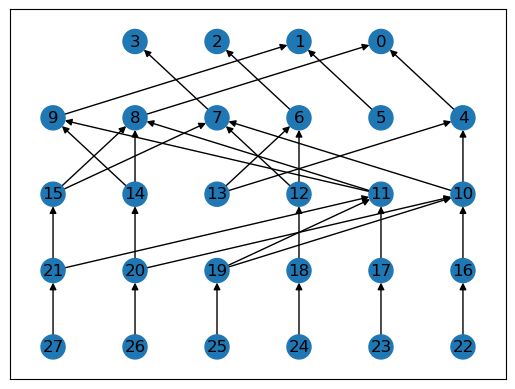

In [9]:
#draw pedigree with 4 founders, selfing f1, random f2, 0.5 selfing f3, selfing f4
draw_pedigree(test_ts.tree_sequence())

In [10]:
arg_norec = msprime.sim_ancestry(
    initial_state=test_ts, model="fixed_pedigree", random_seed=42, recombination_rate = 0)

In [11]:
print(arg_norec.dump_tables().edges)

╔══╤════╤═════╤══════╤═════╤════════╗
║id│left│right│parent│child│metadata║
╠══╪════╪═════╪══════╪═════╪════════╣
║0 │   0│  100│    37│   48│        ║
║1 │   0│  100│    37│   49│        ║
║2 │   0│  100│    39│   50│        ║
║3 │   0│  100│    39│   51│        ║
║4 │   0│  100│    40│   52│        ║
║5 │   0│  100│    40│   53│        ║
║6 │   0│  100│    42│   54│        ║
║7 │   0│  100│    42│   55│        ║
║8 │   0│  100│    20│   44│        ║
║9 │   0│  100│    20│   45│        ║
║10│   0│  100│    22│   39│        ║
║11│   0│  100│    22│   46│        ║
║12│   0│  100│    17│   42│        ║
║13│   0│  100│    17│   47│        ║
║14│   0│  100│     0│   20│        ║
║15│   0│  100│     1│   17│        ║
║16│   0│  100│     2│   22│        ║
║17│   0│  100│     4│   37│        ║
║18│   0│  100│     6│   40│        ║
╚══╧════╧═════╧══════╧═════╧════════╝



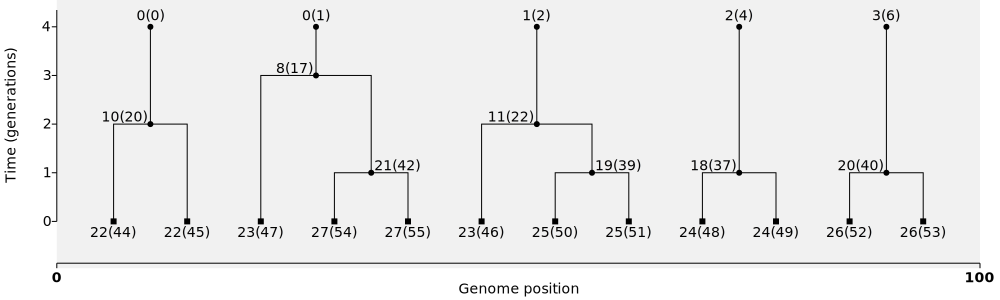

In [12]:
draw_ancestry(arg_norec, x_size = 1000, y_size = 300)

In [13]:
arg_rec = msprime.sim_ancestry(
    initial_state=test_ts, model="fixed_pedigree", random_seed=42, recombination_rate = 0.0003)

In [14]:
print(arg_rec.dump_tables())

TableCollection

Sequence Length: 100.0
Time units: generations
Metadata: b''

Individuals
╔══╤═════╤════════╤═══════╤═════════════════╗
║id│flags│location│parents│metadata         ║
╠══╪═════╪════════╪═══════╪═════════════════╣
║0 │    0│        │ -1, -1│ {'file_id': '0'}║
║1 │    0│        │ -1, -1│ {'file_id': '1'}║
║2 │    0│        │ -1, -1│ {'file_id': '2'}║
║3 │    0│        │ -1, -1│ {'file_id': '3'}║
║4 │    0│        │   0, 0│ {'file_id': '4'}║
║5 │    0│        │   1, 1│ {'file_id': '5'}║
║6 │    0│        │   2, 2│ {'file_id': '6'}║
║7 │    0│        │   3, 3│ {'file_id': '7'}║
║8 │    0│        │   0, 0│ {'file_id': '8'}║
║9 │    0│        │   1, 1│ {'file_id': '9'}║
║10│    0│        │   4, 7│{'file_id': '10'}║
║11│    0│        │   9, 8│{'file_id': '11'}║
║12│    0│        │   7, 6│{'file_id': '12'}║
║13│    0│        │   6, 4│{'file_id': '13'}║
║14│    0│        │   8, 9│{'file_id': '14'}║
║15│    0│        │   7, 8│{'file_id': '15'}║
║16│    0│        │ 10, 10│{'file_i

In [15]:
get_offspring(arg_rec)

[44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

In [16]:
print(arg_rec.edges_left)

[ 0.  0.  0.  0.  0.  0. 70. 70.  0.  0.  0.  0.  3.  3.  0.  0. 70.  0.
  0.  0.  3. 70.  0.]


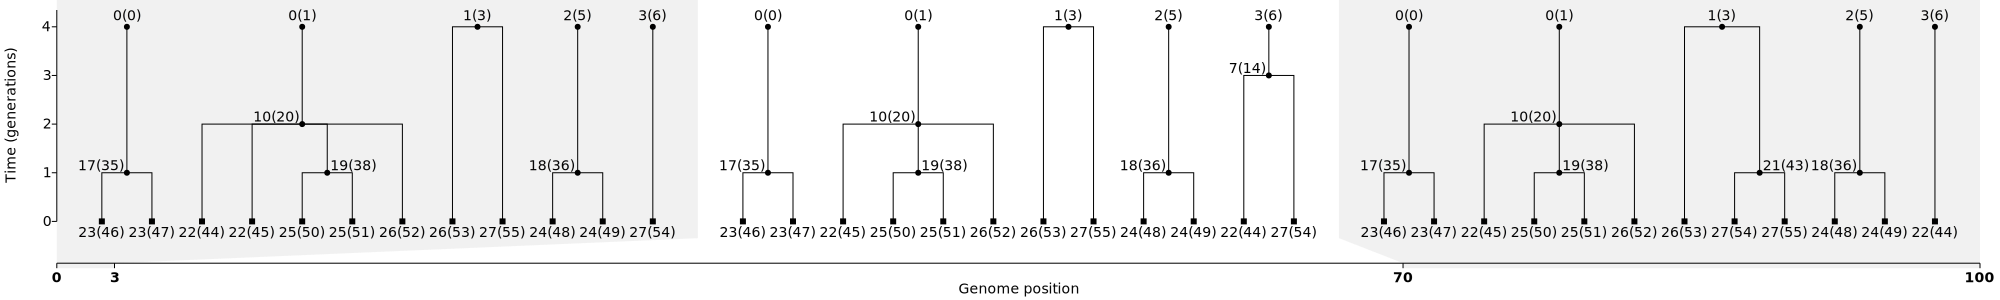

In [17]:
draw_ancestry(arg_rec, x_size = 2000, y_size = 300)

In [18]:
#generate pedigrees for breeding scheme

#bulk selection
def bulk_method(n = 10, selfing_genos = 2, random_mating_genos = 2, rm_size_diff = 10, selection_step = [20, 5, 1]):
    df = pedigree_init(n)
    for i in range(0, selfing_genos):
        df = add_selfing(df)
    parent_size = len(df.loc[df['time'] == df['time'].min(), "id"])
    if (parent_size+rm_size_diff) < 0:
        raise ValueError('Random mating size difference eliminates all individuals!')
    df = add_random_mating(df, size_diff = rm_size_diff)
    for i in range(0, random_mating_genos - 1):
        #selection step or natural selection!
        df = add_random_mating(df)
    for i in range(0, len(selection_step)):
    #selection steps each!    
        parent_size = len(df.loc[df['time'] == df['time'].min(), "id"])
        if (parent_size-selection_step[i]) < 0:
            raise ValueError('Selection_step bigger than remaining individuals!')
        df = add_selfing(df, size_diff = -parent_size+selection_step[i])    
    return(df)
#and so on copy from breeding functions

In [19]:
bulk_ped = bulk_method(n = 5, selfing_genos = 3, random_mating_genos = 2, rm_size_diff = 3, selection_step = [7, 5, 2])

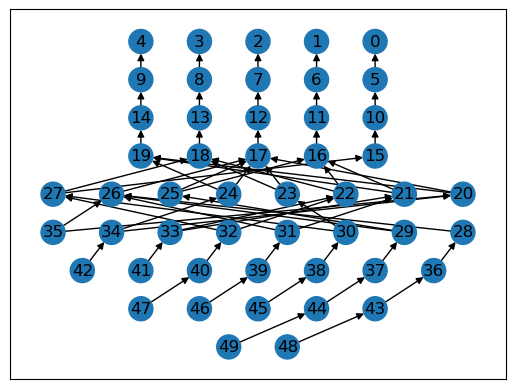

In [20]:
draw_pedigree(df_to_ts(bulk_ped).tree_sequence())

In [21]:
bulk_ts = df_to_ts(bulk_ped)

In [22]:
ped_ts = msprime.sim_ancestry(
    initial_state=bulk_ts, model="fixed_pedigree", random_seed=42, recombination_rate = 0.001)

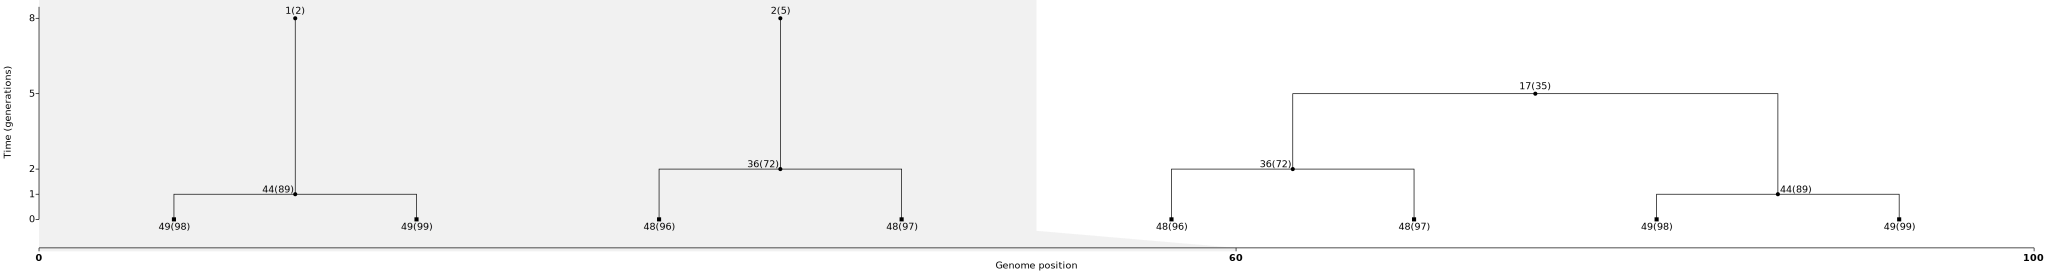

In [23]:
draw_ancestry(ped_ts)